In [1]:
import networkx as nx
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# make a random spin vector
def random_state():
    return 2*((np.random.random(N) > 0.5).astype('float') - 0.5)

In [3]:
# cost function of spin glass
def cost(J, x):
    return (x.T @ J @ x)/N**1.5

In [4]:
# find best local update
def local_search(J, f, x, verbose=False):
    pr = print if verbose else lambda *x: x
    best = f(J, x)
    loops = 0
    pr('-')
    pr('start cost:', best)
    while True:
        if loops % 20 == 0:
            pr('loop', loops, 'cost:', best)
        bestpos = None
        for i in range(N):
            x[i] *= -1
            newcost = f(J, x)
            if newcost < best:
                best = newcost
                bestpos = i
            x[i] *= -1
        if bestpos == None:
            break
        x[bestpos] *= -1
        loops += 1
    pr('final cost:', best)
    return x, best

In [5]:
# initialize random couplings
N = 200
J = np.random.normal(size=(N,N))
x = random_state()
x, best = local_search(J, cost, x, verbose=True)

-
start cost: 0.08759910087678596
loop 0 cost: 0.08759910087678596
loop 20 cost: -0.39087070518004546
loop 40 cost: -0.6478017710308193
loop 60 cost: -0.8036595333440774
loop 80 cost: -0.8964781476205971
loop 100 cost: -0.9635012906426891
final cost: -0.9850169828722638


At large N, this should approach the Parisi constant $\sqrt{2} * 0.7632... = 1.079...$, 2**0.5 * 0.7632but the exact value depends on the spin glass. 

In [6]:
2**0.5 * 0.7632

1.0793277908031462

Now we try using a bounded alternative function, $K' =  -tanh$. The strategy is to local search, then use tanh just below that area.



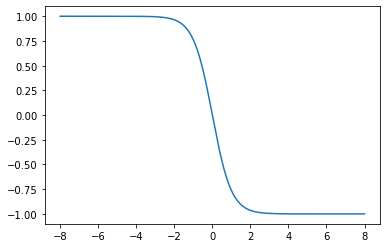

In [7]:
inps = np.linspace(-8, 8, 10000)
plt.plot(inps, -np.tanh(inps))

In [8]:
# integral of tanh is ln |cosh (x)|
def make_g(f, transition_pt):
    return lambda J, x: -np.log(np.abs(np.cosh(f(J, x) - transition_pt)))

In [9]:
N = 100
J = np.random.normal(size=(N,N))

x = random_state()
x, best = local_search(J, cost, x)
x_best = x
print(best)
for i in range(100):
    g = make_g(cost, best-0.01) # the 0.01 controls the offset
    x, _ = local_search(J, g, x)
    x, test = local_search(J, cost, x)
    if i % 10 == 0:
        print(best, test)
    if test < best:
        best = test
        x_best = x

-0.9464173888754903
-0.9464173888754903 -0.8545211150237193
-1.00693663436774 -0.9303740341919693
-1.00693663436774 -0.9290480898417486
-1.00693663436774 -0.9350048791113655
-1.00693663436774 -0.9057240012752328
-1.00693663436774 -0.9290480898417486
-1.00693663436774 -0.9350048791113655
-1.00693663436774 -0.9057240012752328
-1.00693663436774 -0.9290480898417486
-1.00693663436774 -0.9350048791113655


In [10]:
x_best

array([ 1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.])

Other things we could try:
* change the width of the tanh function
* implement the other functions like hBOA or GA ? (These are quite complicated...)
* test at small N? (implement branch n bround?) or not, it's cool... might want to see if we're getting the right minimum....